In [112]:
print(__doc__)

Automatically created module for IPython interactive environment


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

In [114]:
df0=pd.read_csv('1124_Added_J_Labels_New_marked_news.csv')
df0=df0.drop(['date','time','Date_x','Date_y','Unnamed: 0'],axis=1)
df1=pd.read_csv('news_score.1csv.csv')
df1=df1[['author','publisher','title','tfidf','source_url','publisher_L' ,'author_L' ,'score_sentiment', 'magnitude_sentiment']]
df0=df0.dropna()
df=pd.merge(df0,df1, on=['author','publisher','title','source_url'] )
df=df.drop_duplicates()
df.head()

,author,contents,description,J_label,publisher,source_url,title,Open,High,Low,...,Average,Volatility,SD,publisherLabel,Mark,tfidf,publisher_L,author_L,score_sentiment,magnitude_sentiment
0,Financial Times,merryn somerset webb over past year overall cu...,"It’s pretty, it’s useful and you don’t need a ...",0.0,Financial Times,https://www.ft.com/content/d89e5386-074a-11e8-...,"Forget bitcoin, give me old-fashioned gold as ...",8547.864403,8562.224306,8533.223049,...,12603.49354,433909.3344,2087.647258,364,0.0,1.05975,3.0,3.0,0.8,0.8
1,Tom Rees,bitcoin value crashed bn week plunge extended ...,A total of $50bn has been wiped off Bitcoin's ...,-1.0,The Telegraph,http://www.telegraph.co.uk/business/2018/02/02...,Bitcoin extends freefall as over $50bn is wipe...,8547.864403,8562.224306,8533.223049,...,12603.49354,433909.3344,2087.647258,1002,0.0,0.61500,1.0,0.0,-0.1,0.1
2,Vishal Aaditya Kundu,trak trak popular indian business technology m...,The focus on cybersecurity shows the support f...,0.0,Trak.in,http://trak.in/tags/business/2018/02/02/govern...,Government Ready To Take Up Serious Cybersecur...,8547.864403,8562.224306,8533.223049,...,12603.49354,433909.3344,2087.647258,1090,0.0,0.29510,1.0,0.0,0.6,0.6
3,CoinTelegraph By William Suberg,cointelegraph bitcoin hits multi month low cry...,"Bitcoin hits multi-month low, cryptocurrency m...",-1.0,Cointelegraph.com,https://cointelegraph.com/news/bitcoin-hits-mu...,Bitcoin Hits Multi-Month Low As Mainstream Med...,8547.864403,8562.224306,8533.223049,...,12603.49354,433909.3344,2087.647258,199,0.0,0.41481,3.0,1.0,-0.5,0.5
4,Felecia Genêt,i phrase deserves exist it probably inspired m...,A look into if cryptocurrencies even deserve t...,0.0,Medium.com,https://medium.com/the-mission/the-objective-r...,The Objective-Realist vs. the Crypto-Evangelist.,8547.864403,8562.224306,8533.223049,...,12603.49354,433909.3344,2087.647258,659,0.0,0.97797,1.0,0.0,-0.2,0.2


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 268
Data columns (total 24 columns):
author                 138 non-null object
contents               138 non-null object
description            138 non-null object
J_label                138 non-null float64
publisher              138 non-null object
source_url             138 non-null object
title                  138 non-null object
Open                   138 non-null float64
High                   138 non-null float64
Low                    138 non-null float64
Close                  138 non-null float64
Volume_(BTC)           138 non-null float64
Volume_(Currency)      138 non-null float64
Weighted_Price         138 non-null float64
Average                138 non-null float64
Volatility             138 non-null float64
SD                     138 non-null object
publisherLabel         138 non-null object
Mark                   138 non-null float64
tfidf                  138 non-null float64
publisher_L            

In [116]:
rng = np.random.RandomState(0)

In [117]:
X=df[['publisher_L','author_L']]
y=df['J_label']



In [118]:
# step size in the mesh
h = .2

In [119]:
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

In [120]:
# create a mesh to plot in
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

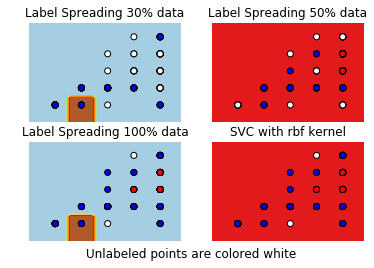

In [121]:
# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2:(0.8, 0.6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

In [122]:
X=df[['score_sentiment','magnitude_sentiment']]
y=df['J_label']



In [123]:
h = .2

In [124]:
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (label_propagation.LabelSpreading().fit(X, y_30),
        y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50),
        y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

In [125]:
# create a mesh to plot in
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

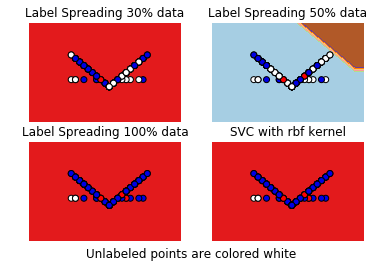

In [126]:
# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2:(0.8, 0.6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()